In [123]:
import pandas as pd
import argparse
import collections
import csv
import simplejson as json
import random
import gc
import os
import glob
import numpy as np
import re
import datetime as dt
# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
#os.chdir("../project3/data/yelp_dataset_2020/selected/Round_3")
#os.chdir(os.getcwd())
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)
pd.set_option("display.max_rows", None)

#pd.set_option('display.max_colwidth', 0)

#DO NOT RUN
#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#df_scope_elite_19 = pd.concat([pd.read_csv(f, names=['user_id','elite_status']) for f in all_filenames ])
##export to csv
#df_scope_elite_19.to_csv( "yelp_selected_elites.csv", index=False, encoding='utf-8-sig')

In [2]:
scope_yelp_users = pd.read_csv('../project3/need_to_scrape.csv')

In [3]:
df_user_18 = pd.read_csv('../project3/data/yelp_dataset_2019/user.csv')
df_user_18 = df_user_18.reindex(sorted(df_user_18.columns), axis=1)
df_user_18.drop_duplicates(keep=False,inplace=True) 
df_scope_user_18 = scope_yelp_users.merge(df_user_18, left_on='user_id', right_on='user_id').copy()

del [[df_user_18]]
gc.collect()

/Users/chen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


7

In [4]:
#DEFINTE SELECTED ELITES
df_scope_elite_19 = pd.read_csv('../project3/data/yelp_dataset_2020/selected/Round_3/yelp_selected_elites.csv')
df_scope_elite_19['2019_elite_status'] = df_scope_elite_19['elite_status'].str.contains('19')
df_scope_user_18 = df_scope_user_18.merge(df_scope_elite_19, left_on='user_id', right_on='user_id').copy()

del [[df_scope_elite_19]]
gc.collect()

33

In [5]:
#2018 RAW
df_review_18 = pd.read_csv('../project3/data/yelp_dataset_2019/review.csv')
df_review_18 = df_review_18.reindex(sorted(df_review_18.columns), axis=1)
df_scope_review_18 = scope_yelp_users.merge(df_review_18, left_on='user_id', right_on='user_id').copy()

del [[df_review_18]]
gc.collect()

0

In [6]:
df_tip_18 = pd.read_csv('../project3/data/yelp_dataset_2019/tip.csv')
df_tip_18 = df_tip_18.reindex(sorted(df_tip_18.columns), axis=1)
df_scope_tip_18 = scope_yelp_users.merge(df_tip_18, left_on='user_id', right_on='user_id').copy()

del [[df_tip_18]]
gc.collect()

20

In [7]:
df_business_18 = pd.read_csv('../project3/data/yelp_dataset_2019/business.csv')
df_scope_tip_business_18 = df_scope_tip_18.merge(df_business_18, how='left', left_on='business_id', right_on='business_id').copy()
df_scope_review_business_18 = df_scope_review_18.merge(df_business_18, how='left', left_on='business_id', right_on='business_id').copy()

del [[df_business_18]]
gc.collect()


/Users/chen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,34,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0

In [8]:
#2017 Yelp Processing
df_user_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_user.csv')
df_user_17 = df_user_17.reindex(sorted(df_user_17.columns), axis=1)
df_user_17.drop_duplicates(keep=False,inplace=True) 
df_scope_user_17 = scope_yelp_users.merge(df_user_17,how='left', left_on='user_id', right_on='user_id').copy()

del [[df_user_17]]
gc.collect()

0

In [9]:
df_review_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_review.csv')
df_scope_review_17 = scope_yelp_users.merge(df_review_17, left_on='user_id', right_on='user_id').copy()

del [[df_review_17]]
gc.collect()

20

In [10]:
df_tip_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_tip.csv')
df_scope_tip_17 = scope_yelp_users.merge(df_tip_17, left_on='user_id', right_on='user_id').copy()

del [[df_tip_17]]
gc.collect()

20

In [11]:
df_business_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_business.csv')
df_scope_tip_business_17 = df_scope_tip_17.merge(df_business_17, how='left', left_on='business_id', right_on='business_id').copy()
df_scope_review_business_17 = df_scope_review_17.merge(df_business_17, how='left', left_on='business_id', right_on='business_id').copy()

del [[df_business_17]]
gc.collect()

0

In [12]:
#df_scope_tip_business_18
#df_scope_review_business_18
#df_scope_user_18
#df_scope_tip_business_17
#df_scope_review_business_17
#df_scope_user_17

In [13]:
#2017 RAW
#df_review_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_review.csv', nrows=1000)
#df_user_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_user.csv', nrows=1000)
#df_tip_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_tip.csv', nrows=1000)
#df_business_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_business.csv', nrows=1000)
#df_checkin_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_checkin.csv', nrows=1000)

In [14]:
#df_scope_tip_business_18
#df_scope_review_business_18
#df_scope_user_18

In [15]:
#engineer user 2018
df_scope_user_18['friends'].replace('None',np.NaN,inplace=True)
df_scope_user_18['num_friends'] = df_scope_user_18['friends'].map(lambda x: len([i.strip() for i in x.split(",")]) if pd.notnull(x) else None)
df_scope_user_18['2018_elite_status'] = df_scope_user_18['elite'].str.contains('2018')
df_scope_user_18['num_years_elite'] = df_scope_user_18['elite'].map(lambda x: len([i.strip() for i in str(x).split(",")]) if pd.notnull(x) else None)
df_scope_user_18['elite'].fillna(0, inplace=True)
df_scope_user_18['num_compliments'] = df_scope_user_18[['compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer']].sum(axis=1)
df_scope_user_18['num_votes'] = df_scope_user_18[['cool','funny','useful']].sum(axis=1)
df_scope_user_18['yelping_since'] = pd.to_datetime(df_scope_user_18['yelping_since'])
end_date_18 = pd.to_datetime("12/31/2018")
df_scope_user_18['num_days_acct_created'] = (end_date_18-df_scope_user_18['yelping_since']).dt.days
df_scope_user_18['num_years_elite'].fillna(0, inplace = True) 


In [16]:
f_df_scope_user_18 = df_scope_user_18[['user_id', 'average_stars', 'fans', 'name', 'review_count','2018_elite_status', '2019_elite_status', 'num_friends', 'num_years_elite', 'num_compliments', 'num_votes', 'num_days_acct_created']]

In [17]:
#engineer user 2017
df_scope_user_17['num_friends'] = df_scope_user_17['friends'].map(lambda x: len([i.strip() for i in x.split(",")]) if pd.notnull(x) else None)

In [18]:
#engineer user 2017
df_scope_user_17['friends'].replace('None',np.NaN,inplace=True)
df_scope_user_17['num_years_elite'] = df_scope_user_17['elite'].map(lambda x: len([i.strip() for i in str(x).split(",")]) if pd.notnull(x) and x != 'None' else 0)
df_scope_user_17['num_compliments'] = df_scope_user_17[['compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer']].sum(axis=1)
df_scope_user_17['num_votes'] = df_scope_user_17[['cool','funny','useful']].sum(axis=1)
df_scope_user_17['yelping_since'] = pd.to_datetime(df_scope_user_17['yelping_since'])
end_date_17 = pd.to_datetime("12/31/2017")
df_scope_user_17['num_days_acct_created'] = (end_date_17-df_scope_user_17['yelping_since']).dt.days
df_scope_user_17['num_years_elite'].fillna(0, inplace = True) 

In [19]:
f_df_scope_user_17 = df_scope_user_17[['user_id', 'average_stars', 'fans', 'name', 'review_count', 'num_friends', 'num_years_elite', 'num_compliments', 'num_votes', 'num_days_acct_created']]

In [20]:
df_scope_user_17_18 = f_df_scope_user_18.merge(f_df_scope_user_17, how='inner', left_on='user_id', right_on='user_id',suffixes=('_2018', '_2017')).copy()

In [21]:
full_df_scope_user_17_18 = df_scope_user_18.merge(df_scope_user_17, how='inner', left_on='user_id', right_on='user_id',suffixes=('_2018', '_2017')).copy()

In [22]:
df_scope_user_17_18 = df_scope_user_17_18.reindex(sorted(df_scope_user_17_18.columns), axis=1)

In [23]:
#SET FEATURES
df_scope_user_17_18['2019_elite_status'].fillna(False, inplace=True)
df_scope_user_17_18['num_votes_delta'] = df_scope_user_17_18['num_votes_2018'] - df_scope_user_17_18['num_votes_2017']
df_scope_user_17_18['num_compliments_delta'] = df_scope_user_17_18['num_compliments_2018'] - df_scope_user_17_18['num_compliments_2017']
df_scope_user_17_18['num_friends_delta'] = df_scope_user_17_18['num_friends_2018'] - df_scope_user_17_18['num_friends_2017']
df_scope_user_17_18['review_count_delta'] = df_scope_user_17_18['review_count_2018'] - df_scope_user_17_18['review_count_2017']
df_scope_user_17_18['fans_delta'] = df_scope_user_17_18['fans_2018'] - df_scope_user_17_18['fans_2017']
#df_scope_user_17_18['_delta'] = df_scope_user_17_18['_2018'] - df_scope_user_17_18['_2017']



In [82]:
df_scope_review_business_18['date'] = pd.to_datetime(df_scope_review_business_18['date']) 
df_scope_review_business_18['count_words'] = df_scope_review_business_18['text'].apply(lambda x: len(str(x).split(' ')))
df_scope_review_business_18['count_chars'] = df_scope_review_business_18['text'].str.len()

In [90]:
grouped_df_scope_review_business_18 = df_scope_review_business_18.groupby([df_scope_review_18['date'].dt.year,df_scope_review_business_18['user_id']]) \
       .agg({'review_id':'count', 'count_words':'mean','count_chars':'mean'}) \
       .rename(columns={'review_id':'num_reviews','count_words':'mean_num_word','count_chars':'mean_num_chars'}) \
       .reset_index() \
       .sort_values(['user_id','date'],ascending=False)


In [ ]:
grouped_df_scope_review_business_18

In [125]:
df = df_scope_user_17_18

In [126]:
df['review_count_delta'].fillna(0, inplace = True)
df['num_friends_delta'].fillna(0, inplace = True)
df['fans_delta'].fillna(0, inplace = True)
df['2018_elite_status'].fillna(False, inplace = True)

In [112]:
x_train, x_test, y_train, y_test = train_test_split(df[['review_count_delta','num_votes_delta',
                                                        'num_compliments_delta','num_years_elite_2018',
                                                        'fans_delta','2018_elite_status','average_stars_2018'
                                                       ]], 
                                                    df['2019_elite_status'], 
                                                    test_size = 0.2, random_state=42)

In [127]:
x_train, x_test, y_train, y_test = train_test_split(df[['review_count_delta','num_votes_delta',
                                                        'num_compliments_delta','num_years_elite_2018',
                                                        'fans_delta','average_stars_2018'
                                                       ]], 
                                                    df['2018_elite_status'], 
                                                    test_size = 0.2, random_state=42)

In [128]:
log = LogisticRegression()
log.fit(x_train, y_train)

/Users/chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
x_test['pred_y'] = log.predict(x_test)

In [116]:
x_test = pd.merge(x_test,y_test ,how = 'left',left_index = True, right_index = True)


In [119]:
df_pred = pd.merge(x_test,df,how = 'left',left_index = True, right_index = True)

In [129]:
y_predict = log.predict(x_test)

print("Default threshold:")
print("Accuracy: {:6.5f}, Precision: {:6.5f},   Recall: {:6.5f}, F1_score: {:6.5f}".format(
                    log.score(x_test, y_test),
                    precision_score(y_test, y_predict), 
                    recall_score(y_test, y_predict),
                    f1_score(y_test, y_predict)
))

#0.5223880597014925 #'review_count_delta','num_votes_delta',with and without 'num_friends_delta'
#0.5373134328358209 #'review_count_delta','num_votes_delta','num_compliments_delta'
#0.66 #'review_count_delta','num_votes_delta','num_compliments_delta','num_years_elite_2018'
#0.6760563380281689 #'review_count_delta','num_votes_delta','num_compliments_delta','num_years_elite_2018','fans_delta'
#0.760233918128655 #'review_count_delta','num_votes_delta','num_compliments_delta','num_years_elite_2018','fans_delta','2018_elite_status'
#0.787878787878788 #review_count_delta','num_votes_delta','num_compliments_delta','num_years_elite_2018','fans_delta','2018_elite_status','average_stars_2018'
#"" with 'num_days_acct_created_2018'

Default threshold:
Accuracy: 0.98880, Precision: 0.79827,   Recall: 0.64269, F1_score: 0.71208


In [121]:
df_pred

,review_count_delta_x,num_votes_delta_x,num_compliments_delta_x,num_years_elite_2018_x,fans_delta_x,2018_elite_status_x,average_stars_2018_x,pred_y,2019_elite_status_x,2018_elite_status_y,2019_elite_status_y,average_stars_2017,average_stars_2018_y,fans_2017,fans_2018,name_2017,name_2018,num_compliments_2017,num_compliments_2018,num_days_acct_created_2017,num_days_acct_created_2018,num_friends_2017,num_friends_2018,num_votes_2017,num_votes_2018,num_years_elite_2017,num_years_elite_2018_y,review_count_2017,review_count_2018,user_id,num_votes_delta_y,num_compliments_delta_y,num_friends_delta,review_count_delta_y,fans_delta_y
75721,0.0,21.0,0.0,0.0,0.0,False,3.36,False,False,False,False,3.36,3.36,0.0,0,Michael,Michael,0.0,0,1627.0,1991,5.0,5.0,0.0,21,0,0.0,11.0,11,Gq7Bw1Y5X0Y_DK1nkcsWWA,21.0,0.0,0.0,0.0,0.0
80184,1.0,33.0,1.0,0.0,0.0,False,3.72,False,False,False,False,3.65,3.72,1.0,1,Michelle,Michelle,2.0,3,2185.0,2549,9.0,9.0,18.0,51,0,0.0,15.0,16,aagwwfjd-7jyzmbyEHDihQ,33.0,1.0,0.0,1.0,0.0
19864,0.0,2.0,0.0,0.0,0.0,False,2.00,False,False,False,False,2.00,2.00,0.0,0,Mr.,Mr.,0.0,0,732.0,1096,1.0,NaN,0.0,2,0,0.0,4.0,4,8nRjOjp8_vxu54O4nctcQw,2.0,0.0,0.0,0.0,0.0
76699,2.0,1.0,0.0,0.0,0.0,False,5.00,False,False,False,False,5.00,5.00,0.0,0,Rachael,Rachael,1.0,1,399.0,763,1.0,NaN,0.0,1,0,0.0,1.0,3,7TdEO5vof2gsFN2xO0GGKg,1.0,0.0,0.0,2.0,0.0
92991,0.0,25.0,0.0,0.0,0.0,False,4.17,False,False,False,False,4.17,4.17,0.0,0,Anna,Anna,0.0,0,1986.0,2350,1.0,NaN,0.0,25,0,0.0,18.0,18,tnO-RiRJsUb70VDGwodXYA,25.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,3.0,4.0,0.0,0.0,0.0,False,3.44,False,False,False,False,3.83,3.44,0.0,0,Abby,Abby,0.0,0,868.0,1232,1.0,1.0,0.0,4,0,0.0,6.0,9,n8gxNpD4k3958tL81qorxQ,4.0,0.0,0.0,3.0,0.0
29313,0.0,0.0,0.0,0.0,0.0,False,5.00,False,False,False,False,NaN,5.00,NaN,0,NaN,Lisa,0.0,0,NaN,314,NaN,NaN,0.0,0,0,0.0,NaN,2,yTdMLXne8j9cALbw3SyJvw,0.0,0.0,0.0,0.0,0.0
37862,0.0,0.0,0.0,0.0,0.0,False,5.00,False,False,False,False,NaN,5.00,NaN,0,NaN,Kelsie,0.0,0,NaN,50,NaN,NaN,0.0,0,0,0.0,NaN,1,wz1erTGxAIvrZiA-ouFrQw,0.0,0.0,0.0,0.0,0.0
53421,0.0,0.0,0.0,0.0,0.0,False,4.50,False,False,False,False,4.50,4.50,0.0,0,Blanca,Blanca,0.0,0,1267.0,1631,3.0,3.0,0.0,0,0,0.0,2.0,2,d0LbZZwB-gOS98D2UP124A,0.0,0.0,0.0,0.0,0.0


In [124]:
df_pred[df_pred['2019_elite_status_x'] == True]

,review_count_delta_x,num_votes_delta_x,num_compliments_delta_x,num_years_elite_2018_x,fans_delta_x,2018_elite_status_x,average_stars_2018_x,pred_y,2019_elite_status_x,2018_elite_status_y,2019_elite_status_y,average_stars_2017,average_stars_2018_y,fans_2017,fans_2018,name_2017,name_2018,num_compliments_2017,num_compliments_2018,num_days_acct_created_2017,num_days_acct_created_2018,num_friends_2017,num_friends_2018,num_votes_2017,num_votes_2018,num_years_elite_2017,num_years_elite_2018_y,review_count_2017,review_count_2018,user_id,num_votes_delta_y,num_compliments_delta_y,num_friends_delta,review_count_delta_y,fans_delta_y
41331,37.0,888.0,7.0,7.0,7.0,True,3.69,True,True,True,True,3.67,3.69,32.0,39,Regina,Regina,108.0,115,2891.0,3255,167.0,171.0,98.0,986,6,7.0,776.0,813,_lqJfN8BVwl6wxfpzkaggg,888.0,7.0,4.0,37.0,7.0
7144,35.0,704.0,19.0,6.0,8.0,True,3.75,True,True,True,True,3.74,3.75,10.0,18,Todd,Todd,65.0,84,2405.0,2769,300.0,325.0,176.0,880,5,6.0,256.0,291,09jpZrKD_j0SG9WPBDSJQg,704.0,19.0,25.0,35.0,8.0
61241,16.0,61.0,0.0,2.0,1.0,True,3.93,True,True,True,True,3.94,3.93,3.0,4,Brandon,Brandon,1.0,1,1863.0,2227,4.0,5.0,7.0,68,1,2.0,51.0,67,oULYOe4aDw7Iapzti3Bdjw,61.0,0.0,1.0,16.0,1.0
73908,11.0,913.0,4.0,6.0,5.0,True,3.66,True,True,True,True,3.65,3.66,41.0,46,Emily,Emily,124.0,128,2664.0,3028,559.0,601.0,278.0,1191,5,6.0,293.0,304,L2MVxXahCzxAQVM8uO7W7w,913.0,4.0,42.0,11.0,5.0
8257,34.0,267.0,20.0,2.0,10.0,True,3.78,True,True,True,True,3.73,3.78,10.0,20,Christene,Christene,9.0,29,2897.0,3261,191.0,267.0,6.0,273,1,2.0,49.0,83,Xo5j0_nCMlL5rQKPCNT1CQ,267.0,20.0,76.0,34.0,10.0
69419,16.0,157.0,8.0,4.0,3.0,True,3.46,True,True,True,True,3.37,3.46,11.0,14,Cindy,Cindy,9.0,17,1903.0,2267,28.0,40.0,4.0,161,3,4.0,98.0,114,bz3Reh0S84qJjAAB_hpl3A,157.0,8.0,12.0,16.0,3.0
36794,2.0,0.0,0.0,0.0,0.0,False,3.57,False,True,False,True,3.80,3.57,0.0,0,Brian,Brian,0.0,0,933.0,1297,31.0,40.0,0.0,0,0,0.0,5.0,7,yWSuMF-hDsKu7CvCzbYyyA,0.0,0.0,9.0,2.0,0.0
93621,27.0,183.0,2.0,2.0,4.0,True,3.78,True,True,True,True,3.76,3.78,2.0,6,Amanda,Amanda,4.0,6,738.0,1102,173.0,226.0,0.0,183,1,2.0,116.0,143,0SrL-8JDNLghUuUhiFccSQ,183.0,2.0,53.0,27.0,4.0
94235,35.0,990.0,18.0,3.0,5.0,True,3.95,True,True,True,True,3.98,3.95,13.0,18,Bonnie,Bonnie,65.0,83,750.0,1114,209.0,283.0,80.0,1070,2,3.0,241.0,276,kArTuWjGVEHXDvXcEvYh-w,990.0,18.0,74.0,35.0,5.0
18005,75.0,128.0,14.0,2.0,5.0,True,4.22,True,True,True,True,4.24,4.22,3.0,8,Natalia,Natalia,18.0,32,2597.0,2961,88.0,125.0,19.0,147,1,2.0,78.0,153,GOuvqIeyo9YzVB_i84neZg,128.0,14.0,37.0,75.0,5.0


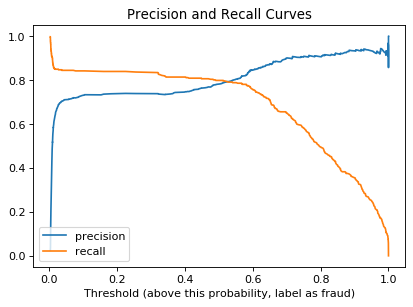

In [38]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, log.predict_proba(x_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

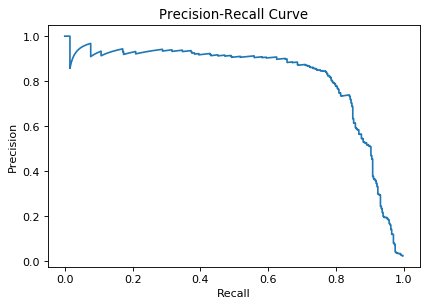

In [39]:

plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [41]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(x_test)[:,1])

ROC AUC score =  0.9774881035645592


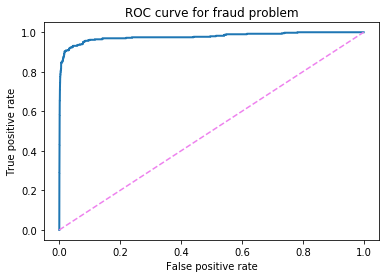

In [43]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, log.predict_proba(x_test)[:,1]))

/Users/chen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/chen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/chen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/chen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


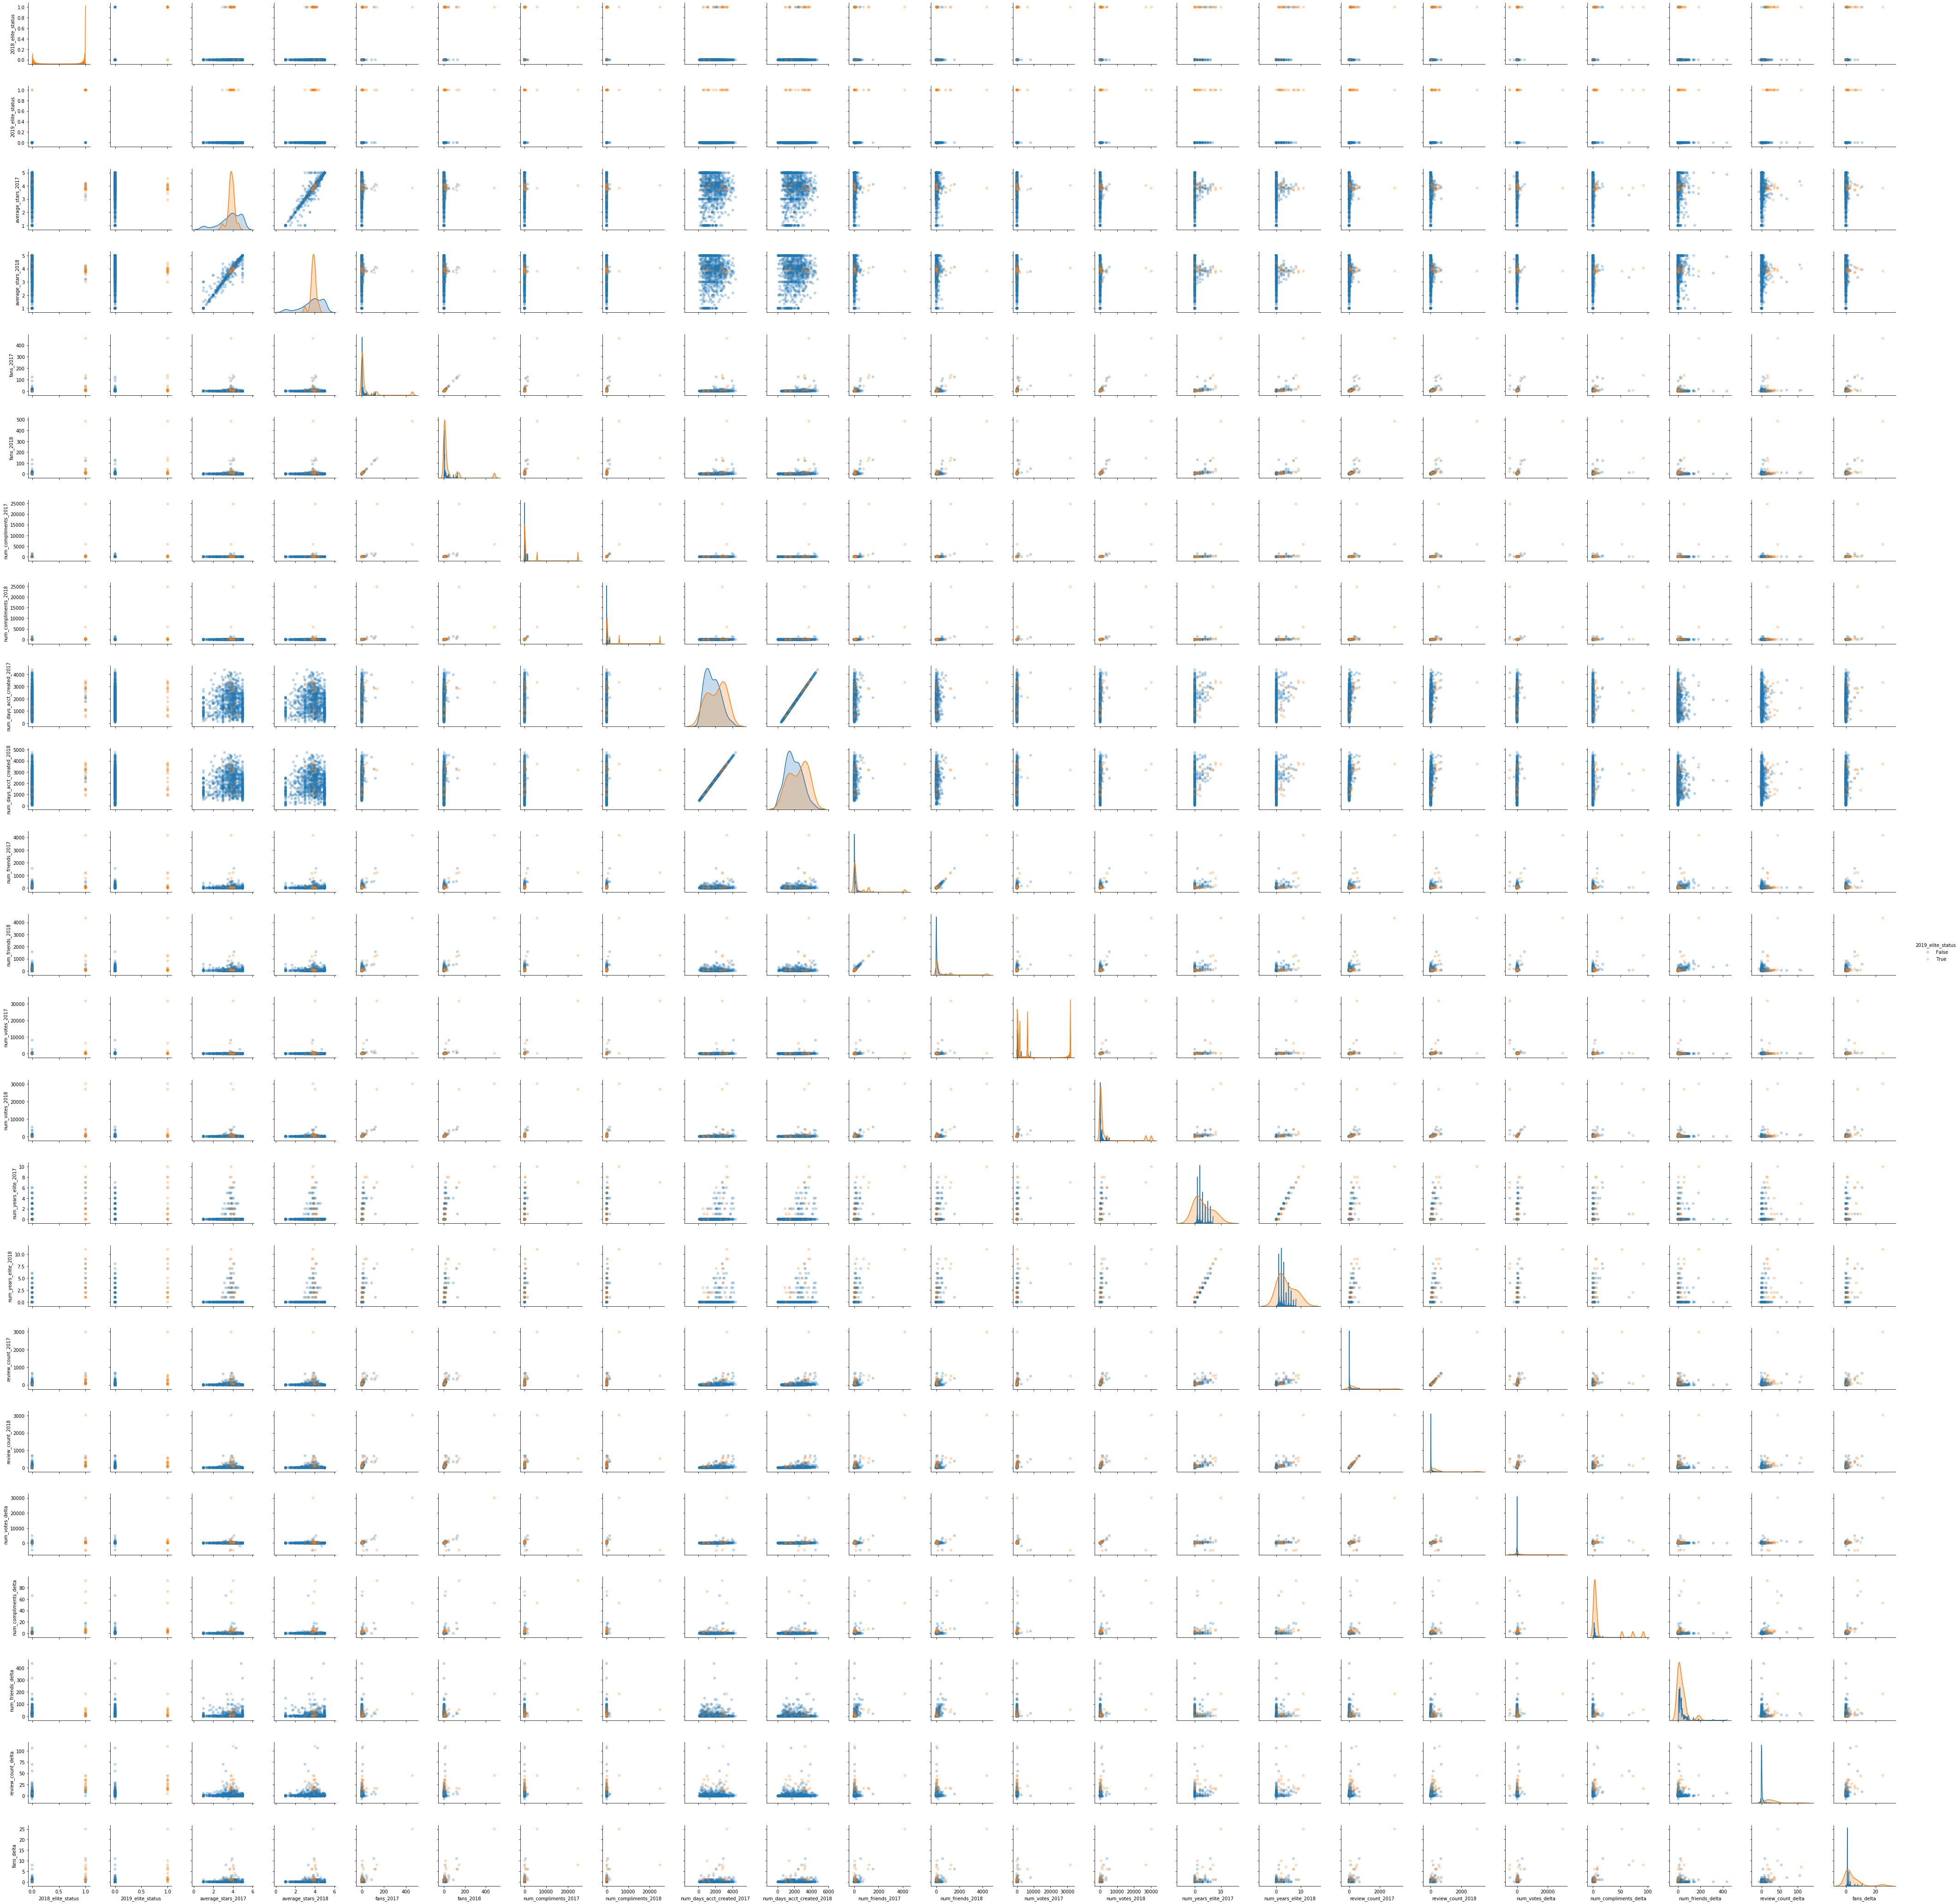

In [94]:
def plot_features(df, sample_size=500):
    
    sample = (df.drop(['user_id'],axis=1)
                .sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='2019_elite_status', plot_kws=dict(alpha=.3, edgecolor='none'))

plot_features(df)